<font face="Times" size="7">
<b>
<i>
<center>Introduction To The Finite Element Method With Python: Part 1</center>
</i>
<font face="Times" size="5">
<center>J. F. Cardenas (2021)</center>
    <center>Spectranova.net</center>     
</font>
</b>
</font>

# Requirements
You should be familiar with how to:


* use notebooks in Jupyter lab (or classic)
* import packages in Python
* use Numpy arrays
If you think you need a short tutorial on the three issues above, look at my previous tutorials (at spectranova.net):
1) "Interactive Computational Physics With Python : Parabolic Motion In Gravity"
2) "How To Interactively Work With J-Notebooks"

# The Residual Integral Equation



There are three ways to numerically solve a Partial Differential Equation (PDE), such as $\ref{eq1}$, and those are the finite difference method, the variational method and the weighted residual method which is the foundation for the Finite Element Method(FEM): 

$
\begin{align}
D\frac {d^2 \phi}{d x^2}- Q(x)=0
\label{eq1}\tag{1.1}
\end{align}
$

When trying to find an approximate numeric solution to a PDE using the weighted residual method, e.g., we encounter the problem that the approximate solution ($\phi_a$) yields a residual error (as in $\ref{eq2}$), which has to be minimized at discrete points. Hence, the right hand side will **NOT** be zero, but a residual error function, R(x).
$
\begin{align}
D\frac {d^2 \phi_a}{d x^2}- Q(x)=R(x)
\label{eq2}\tag{1.2}
\end{align}
$


The minimization of $R(x)$ can be performed by summing up the square of the difference over the region where the PDE is to be solved, which is a least squares method of finding the most accurate solution ( $\phi_a (x) $). In integral form this equals:

$
\begin{align}
Error =\int_0^H [R(x)]^2
\label{eq3}\tag{1.3}
\end{align}
$

However, if we make a certain modification to the integral and exchange one of the residual fuctions with a weighting function, W(x), such that the integral and hence the Error equals zero, the Galerkin approach to FEM is obtained and is expressed by:

$
\begin{align}
\int_0^H [W(x) R(x)] = 0 
\label{eq4}\tag{1.4}
\end{align}
$


As seen, the problem of finding an approximate solution (to $\ref{eq1}$) has been transformed from a minimízation approach ($\ref{eq3}$) to finding a solution for the weighted residual integral equation ($\ref{eq4}$).

Thus, to be explicit, e.g. if we look for the solution to the PDE in $\ref{eq1}$ the weighted residual integral equation becomes:

$
\begin{align}
\int_0^H [W(x)(D\frac {d^2 \phi}{d x^2}- Q(x))]dx 
\label{eq5}\tag{1.5}
\end{align}
$



# Features And Implementation Of The Finite Element Method
The finite element method is a numerical approach to solve PDEs within a region in space and is charaterized by :

* utilizing an integral definition to generate a system of algebraic equations.

* using continuous piecewise smooth functions for approximating the unknown quantity

If consists of the following steps:

1) discretization of the region, hence definition of node values (vertices) and associated subintervalls (called elements). 

2) specify the approximation equation for each subintervall region (element).

3) construct the system of equations in the form of a matrix formulation., i.e., finding the link between the equations of different elements.

4) Manage boundary conditions.

5) solve the system of equations.

6) derive quantities from the solution, e.g. stress or heat flow.

# An introduction To The Integral Formulation Using Galerkin FEM: The Deflection Of A Beam Supported Between Two Points
The Galerkin FEM enables the solution of PDEs within regions without continuous first-derivatives by managing second-derivative terms using integration by parts. Below an initial introduction to the integral formulation is shown.


As an example, the deflecton of a beam with linear load as a function of position, $\phi(x)$ is governed by equation 1.5 (over a region 0 < x <H). Though there is an exact solution to the problem, we may approach the problem by making a qualified guess of the solution, e.g., $\phi_a(x) = A sin(\frac {x \pi}{H} )$. The problem then is a matter of finding the constant $A$.

Notice that the the residual function $R(x)$ is obtained by inserting the expression for $\phi_a(x) = A sin(\frac{\pi x}{H} )$ into the PDE:
 
 $$R(x) = -D\frac{A \pi²}{H²}sin(\frac{\pi x}{H})-M_0$$

Assuming that a reasonable weighting function is given by the approximate solution, i.e. $W(x)=sin(\frac{\pi x}{H})$ then the residual integral equation becommes:
$$ \int_0^H [W(x) R(x)] dx = \int_0^H sin(\frac{\pi x}{H})[ -D\frac{A \pi²}{H²}sin(\frac{\pi x}{H})-M_0] dx=0 $$

Integrating and solving for A, gives:

$$A = -\frac{4M_0H²}{\pi³D}$$ 

and 

$$\phi_a(x)= -\frac{4M_0H²}{\pi³D}sin(\frac{\pi x}{H})$$

Notice that the region, $0 < x < H$ consist of a single intervall and is associated with a single unknown in the integral equation ( i.e. $A$). Let's assume that the region is divided into $n$ subintervalls then the integral equation will solve for $n$ unknowns.

# Dividing The Region Into Linear Subintervalls 
We will assume that $\phi(x)$ describe some quantity (temperature, voltage, stress function, etc) as a function of a spatial variable (x in this case) within a region of interest that is discretized into subintervalls define by its nodes, e.g. $X_i$ and $X_j$ which define element (e), as depicted in the Fig. below.



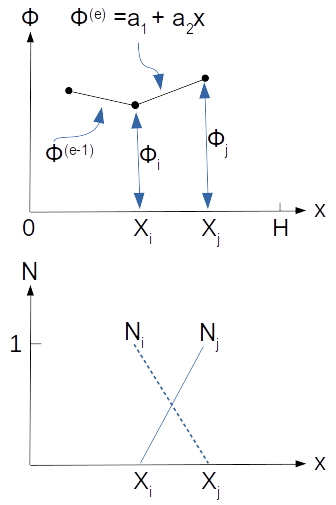
 <a id =1> Figure 1</a>

The approximation of the numerical solution is expected to become increasingly better as we divide the region, $0 < x< H$, into increasingly larger number, $n$, of subintervalls. We will assume that  $\phi(x)$ (we will drop the subscript **a** in $\phi_a$ from now on) can be accurately described by a linear (shape) function within each element, i.e between its nodes with associated $\phi_i$ and $\phi_j$ values. This is given by :
$
\begin{align}
\phi(x)= \frac{X_j-x}{L} \phi_i + \frac{x-X_i}{L} \phi_j
\label{eq6}\tag{1.6}
\end{align}
$



Note that $L=X_j-X_i$. The factors $N_i=\frac{X_j-x}{L}$ and $N_j =\frac{x-X_i}{L}$ are shape functions. Hence, the expression for the dependence of $\phi(x)$ within a specific element (e) is given in a compressed form:
$
\begin{align}
\phi = [N][\phi]
\label{eq7}\tag{1.7}
\end{align}
$

where $[N] = [N_i, N_j]$ is a row vector of shape functions and $[\phi] = \begin{bmatrix} \phi_i \\ \phi_j \end{bmatrix}$ is a column vector. Notice, that $\phi$ is a scalar but [$\phi$] a vector.

## Determining The Temperature Within An Element Using The Shape Function

The example consists of determining the intermediate temperature between two node values located at x=1.5 and x= 6 cm using Python. The approach consists of:
1) importing the necessary packages (Numpy and Pandas)

2) determine the temperature and position vectors using the normal Python syntax. 

Note, the variable $phi\_node$ in the codelines corresponds to temperature.



In [1]:
import numpy as np
import sys
sys.path.append('/home/ninja/PythonWork/webscraping/lib/python3.8/site-packages')
#x_node defines the position of nodes
x_node = np.array([1.5,6])
#phi_node determines the temperature of the nodes
phi_node = np.array([120,90])
# x is the position where the temperature is to be determined
x=2
shape_f = np.zeros(2)
shape_f[0]= (x_node[1]-x)/(x_node[1]-x_node[0])
shape_f[1]= (x-x_node[0])/(x_node[1]-x_node[0])

## The Shape Function
1) each shape function has a value of one at its own node and zero at the opposite node.

2) the sum of the shape functions for a node equals one, independent of dimension (two/three dimensions, they all sum to one).

3) the shape functions are always polynomials of the same type as the original interpolation equation.

To test the first feature, change x to some intermediate value and then to 4.5 and see  how the two values for the shape functions vary. But first , instanciate next code cell and see what the values of the shape functions are!

In [2]:


shape_f

array([0.88888889, 0.11111111])

Next test the second feature with the following codeline using the `sum()` function.

In [3]:
# do the values in "array" sum up to one?
sum(shape_f)

1.0

Now its time to multiply the shape function vector with the node temperature vector to get the intermediate temperature value (equation 1.7). In python this is done with the `.dot` operator. Alternatively, `sum(shape_f*phi_node)`. First, please, change the x value a few cells previuos to this one to an x value of = 2.5. 

In [19]:
# equation 1.7 is implemented
shape_f.dot(phi_node)

116.66666666666666

<span style='color:Red'> A small warning</span>: in Python there is a function `.shape`, which may cause some confusion if you are not carefull. If you type `shape_f.shape` in next code cell the result will show how many rows and column shape_f has!

## Connecting Elements Into A Piecewise Smooth Solution
A continuous piecewise smooth solution to the 1D PDE can be constructed by adding several linear equations of the type described in the previous section. For each element (denoted by superscript (e) ) there corresponds an equation of the type(eq. 1.7 above). This is explicitly written for a region consisting of four elements:

$
\begin{align}
\phi^{(0)} = N_0^0 \phi_0 + N_1^0 \phi_1
\label{eq8}\tag{1.7.1}
\end{align}
$
$
\begin{align}
\phi^{(1)} = N_1^1 \phi_1 + N_2^1 \phi_2
\label{eq9}\tag{1.7.2}
\end{align}
$
$
\begin{align}
\phi^{(2)} = N_2^2 \phi_2 + N_3^2 \phi_3
\label{eq10}\tag{1.7.3}
\end{align}
$
$
\begin{align}
\phi^{(2)} = N_3^3 \phi_3 + N_4^3 \phi_3
\label{eq11}\tag{1.7.4}
\end{align}
$

There are a few issues to comment on with regards to 1.7.1-1.7.4:
1) the indexing (superscript (e) ) of the first element begins at zero. The reason for this is to be consistent with Python standard definitions, since the indexing of a Numpy array begins at ZERO.

2) the superscript and subscript of the shape function determine its associated element and  node, respectively.

3) each node is associated with two shape functions (except the end nodes), e.g. node ONE has a shape function associated with  element ZERO and ONE corresponding to $N_1^0$ and $N_1^1$, respectively.

4) each equation (1.7.1-1.7.4) is valid for a single element and only within that, e.g. 1.7.1 is valid  for $X_0 <x <X_1$ and 1.7.2 is valid  for $X_1 <x <X_2$.

5) the quantity $\phi$ is determined only for nodes and NOT elements!


Note that the element to the left of the one labelled (e) in <br> [figure 1](#1) is labelled (e-1). When adding the subintervalls such that they form a region it's of primordial importance to organize the relation between the elements and its constituting nodes, which may seem trivial in 1D, since the elements sequential order number have a direct correspondence with its physical sequential ordering. However, in two/three dimensions the elements order number do not have a correspondence with its physical ordering. Therefore, we will explicitly write done each elements constituting nodes that is consistent with the system of equations (1.7.1 to 1.7.4). Please instantiate next code cell, and observe the output!



In [6]:
import pandas as pd
df = pd.DataFrame(([[0,1],[1,2],[2,3],[3,4]]),
                  columns = (['node_i', 'node_j']),
                  index=pd.Series([0,1,2,3],name='element'))
df

,node_i,node_j
element,,
0,0,1
1,1,2
2,2,3
3,3,4


As you can see there are three columns, the most left column is the element column. Hence element number 1 is constituted by nodes 1 and 2.

## Defining The Node Array And The Use Of Markers
Each node is associated with a position and additional properties, which may be physical or simply indicate whether the node is part of the periphery. PLease, instantiate next code cell.

In [7]:

df_node = pd.DataFrame(([[0,1],[0.5,0],[1.0,0],[1.5,1]]),
                  columns = (['node_position','marker']),
                  index=pd.Series([0,1,2,3],name='node_index'))
df_node

,node_position,marker
node_index,,
0,0.0,1
1,0.5,0
2,1.0,0
3,1.5,1


Assume that when 'marker' equals ONE the associated node belongs to the periphery (in this example). In most use cases the number of nodes will be at least a few hundred and a method to find out which those nodes are will be helpful. In order to find out which those nodes are, instantiate next code cell. 

In [8]:
df_node['marker']==1

node_index
0     True
1    False
2    False
3     True
Name: marker, dtype: bool

As you see, for each node_index there is an associated 'True' or 'False' result, where 'True' would imply that the node belongs to the periphery.
# Reference literature
For a more detailed analysis of how the equations are derived, please see:
L. J. Segerlind, Applied Finite Element Analysis, 2nd Ed, Wiley, 1984. 
